<a href="https://colab.research.google.com/github/O-Suarez/Proyecto-MLOps/blob/main/TC4033VC_Practica1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**MAESTRÍA EN INTELIGENCIA ARTIFICIAL APLICADA**

**Curso: TC4033 - Visión Computacional**

Tecnológico de Monterrey

Dr. Gilberto Ochoa Ruiz

Semana 2 - Transformaciones y mejoramiento de imágenes



```
INTEGRANTES DEL EQUIPO
```



* Nombre: Paul Edward Muñoz Elivar           - Matrícula: A01795653
* Nombre: Donnovan Alfredo Ramirez Rodriguez - Matrícula: A01795652
* Nombre:  - Matrícula:
* Nombre:  - Matrícula:

# 1. Simple Image Operations

## Table of Contents
1. [Libraries](#libraries)
2. [Loading Images](#loading)
3. [Resizing Images](#resize)
4. [Negative Images](#negative)
5. [Logarithmic Transformation](#log)
6. [Image Binarizer](#bin)
7. [Image Quantizer](#quant)



---


## Importing Libraries <a class="anchor" id="libraries" ></a>

---



In [125]:
#Librerias a utilizar
from matplotlib import image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [126]:
#Cargamos el directorio de google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [127]:
#Directorio donde se encuentran los recursos
import os
DIR = "/content/drive/MyDrive/Colab Notebooks/MNA/TC4033 - Vision Computacional/Semana 2"
os.chdir(DIR)



---


## Loading Images <a class="anchor" id="loading"></a>

---



<class 'numpy.ndarray'>


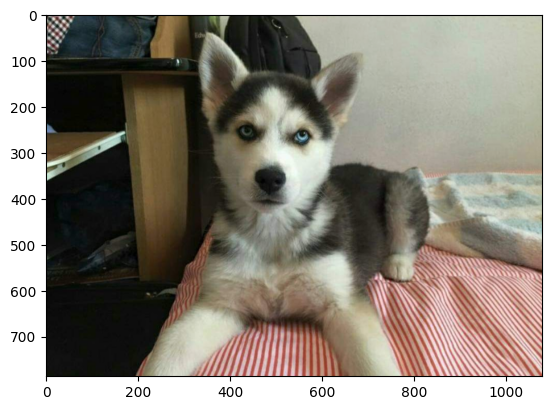

In [128]:
#Cargamos la imagen
img1 = mpimg.imread('paris.png')
plt.imshow(img1)
print(type(img1))

Look at the shape of this array:

In [129]:
#Dimensiones de la imagen, en este caso (Alto = 787 pixeles x Ancho = 1080 pixeles)
img1.shape

(787, 1080, 4)

The image is actually composed of three "layers, or *channels*, for red, green, and blue (RGB) pixel intensities.

Display the same image but this time we'll use another popular Python library for working with images - **cv2**.

numpy.ndarray

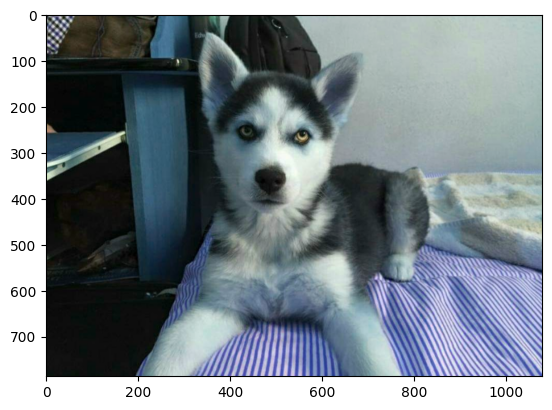

In [130]:
# Cragamos nuevamente la imagen pero ahora usando la biblioteca para trabajar
# con imagenes CV2

img2 = cv2.imread('paris.png')
plt.imshow(img2)
type(img2)

The trouble is that cv2 loads the array of image data with the channels ordered as blue, green, red (BGR) instead of red, green blue (RGB).

Let's fix that

AxesImage(shape=(787, 1080, 3))


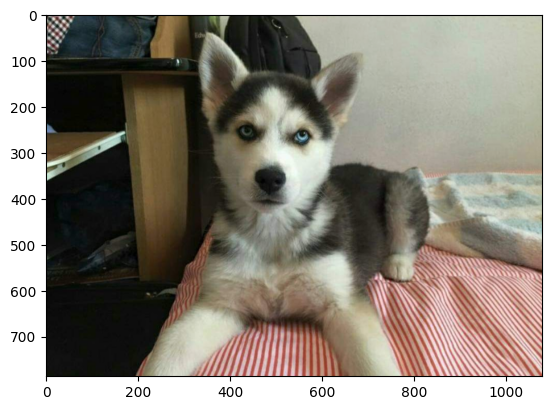

In [131]:
# Cuando usamos CV2 se carga la matriz con los colores ordenados como azul, verde
# y rojo (BGR) en lugar de rojo, verde y azul (RGB), por lo que aplicamos
# el ajuste correspondiente

img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
print(plt.imshow(img2))

Lastly, one more commonly used library for image processing in Python we should consider - **PIL**:

<class 'PIL.PngImagePlugin.PngImageFile'>


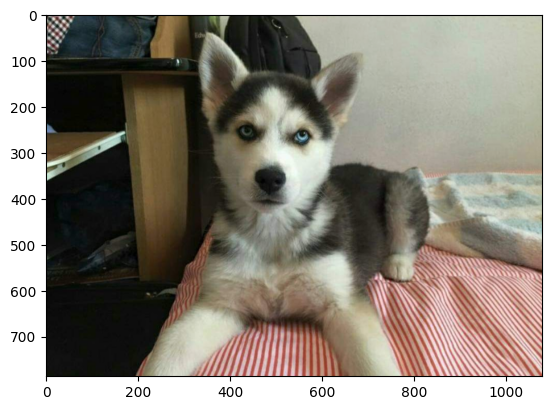

In [132]:
# Ahora realizamos el mismo procedimiento pero usando la biblioteca PIL
from PIL import Image
import matplotlib.pyplot as plt

img3 = Image.open('paris.png')
plt.imshow(img3)
print(type(img3))

It's easy to convert a PIL JpegImageFile to a numpy array

In [133]:
#Convertimos nuestra imagen en una matriz

img3 = np.array(img3)
img3.shape

(787, 1080, 4)

Saving a numpy array in an optimized format, should you need to persist images into storage

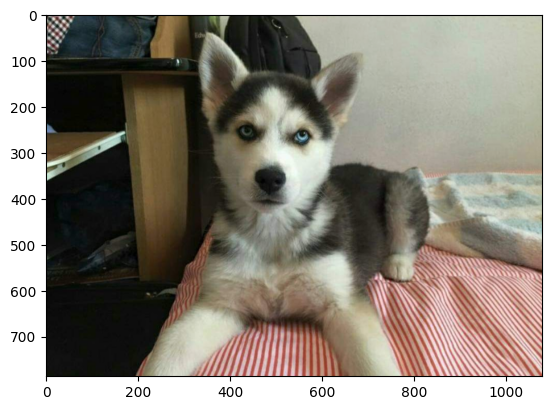

In [134]:
# Guardamos el arreglo en un archivo binario llamado paris en formato .npy

# Save the image
np.save('paris.npy', img3)

# Load the image
img3 = np.load('paris.npy')

plt.imshow(img3)



---


## Resizing an Image <a class="anchor" id="resize"></a>


---


One of the most common manipulations of an image is to resize it.

Generally, we want to ensure that all of your training images have consistent dimensions.

Original size: 1080 x 787
New size: 200 x 200


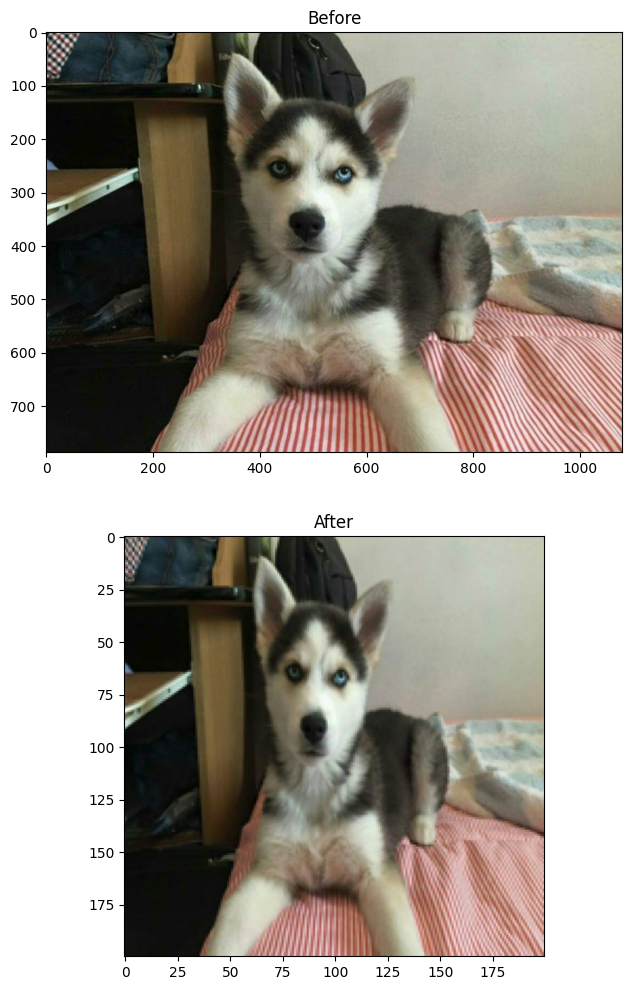

In [135]:
from PIL import Image, ImageOps

# Load the image array into a PIL Image
orig_img = Image.fromarray(img3)

#------------------------------------------- IMAGEN ORIGINAL 1080 x 787
# Get the image size
o_h, o_w = orig_img.size
print('Original size:', o_h, 'x', o_w)

#------------------------------------------- IMAGEN REDIMENZIONADA 200 x 200
# We'll resize this so it's 200 x 200
target_size = (200,200)
new_img = orig_img.resize(target_size)
n_h, n_w = new_img.size
print('New size:', n_h, 'x', n_w)

# Show the original and resized images
# Create a figure
fig = plt.figure(figsize=(12, 12))

# Cargamos la imagen original y la redimenzionada en un subplot

# Subplot for original image
a=fig.add_subplot(2,1,1)
imgplot = plt.imshow(orig_img)
a.set_title('Before')

# Subplot for resized image
a=fig.add_subplot(2,1,2)
imgplot = plt.imshow(new_img)
a.set_title('After')

plt.show()


If we want to resize the image and change its shape without distorting it, we'll need to *scale* the image so that its largest dimension fits our new desired size.

Original size: 1080 x 787
Scaled size: 200 x 146
New size: 200 x 200


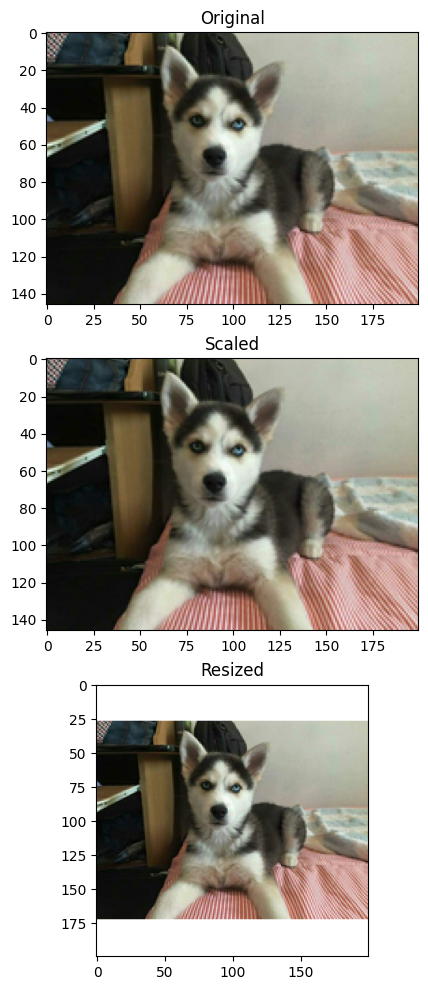

In [136]:
# Get the image size
orig_height, orig_width = orig_img.size
print('Original size:', orig_height, 'x', orig_width)

# We'll resize this so it's 200 x 200
target_size = (200,200)

# Scale the image to the new size using the thumbnail method
scaled_img = orig_img

#scaled_img.thumbnail(target_size, Image.ANTIALIAS)
scaled_img.thumbnail(target_size, Image.Resampling.LANCZOS)

scaled_height, scaled_width = scaled_img.size
print('Scaled size:', scaled_height, 'x', scaled_width)

# Create a new white image of the target size to be the background
new_img = Image.new("RGB", target_size, (255, 255, 255))

# paste the scaled image into the center of the white background image
new_img.paste(scaled_img, (int((target_size[0] - scaled_img.size[0]) / 2), int((target_size[1] - scaled_img.size[1]) / 2)))
new_height, new_width = new_img.size
print('New size:', new_height, 'x', new_width)

# Show the original and resized images
# Create a figure
fig = plt.figure(figsize=(12, 12))

# Subplot for original image
a=fig.add_subplot(3,1,1)
imgplot = plt.imshow(orig_img)
a.set_title('Original')

# Subplot for scaled image
a=fig.add_subplot(3,1,2)
imgplot = plt.imshow(scaled_img)
a.set_title('Scaled')

# Subplot for resized image
a=fig.add_subplot(3,1,3)
imgplot = plt.imshow(new_img)
a.set_title('Resized')

plt.show()



---


## Negative Images <a class="anchor" id="negative"></a>


---



In [137]:
orig_img = cv2.imread('paris.png')
orig_img = cv2.cvtColor(orig_img, cv2.COLOR_BGR2RGB)
img_neg = 255 - orig_img

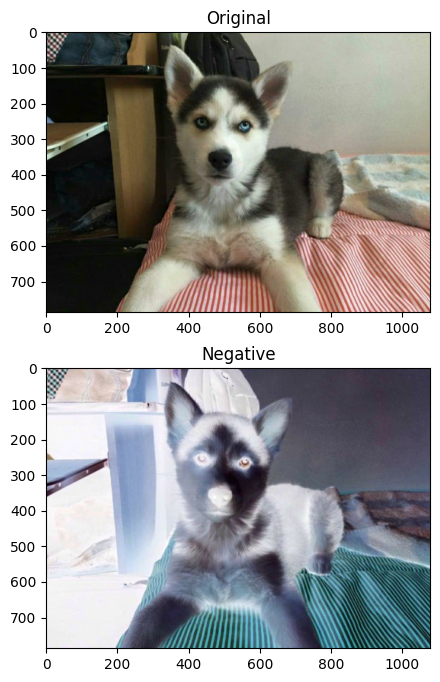

In [138]:
fig = plt.figure(figsize=(8, 8))

# Subplot for original image
a=fig.add_subplot(2,1,1)
imgplot = plt.imshow(orig_img)
a.set_title('Original')

a = fig.add_subplot(2,1,2)
imgplot = plt.imshow(img_neg)
a.set_title('Negative')

plt.show()

## Logarithmic Transformation <a class="anchor" id="log"></a>

$$
S = c * log (1 + r)
$$

where,
- $R$ = input pixel value
- $C$ = scaling constant and
- $S$ = output pixel value

The value of $c$ is chosen such that we get the maximum output value corresponding to the bit size used. So, the formula for calculating $c$  is as follows:

$c = 255 / (log (1 + $ max input pixel value $))$

In [139]:
orig_img = cv2.imread('paris.png')
orig_img = cv2.cvtColor(orig_img, cv2.COLOR_BGR2RGB)

# Apply log transformation method
c = 255 / np.log(1 + np.max(orig_img))
log_img = c * (np.log(orig_img + 1))

# Specify the data type so that
# float value will be converted to int
log_img = np.array(log_img, dtype = np.uint8)

Log transformation of gives actual information by enhancing the image. If we apply this method in an image having higher pixel values then it will enhance the image more and actual information of the image will be lost.

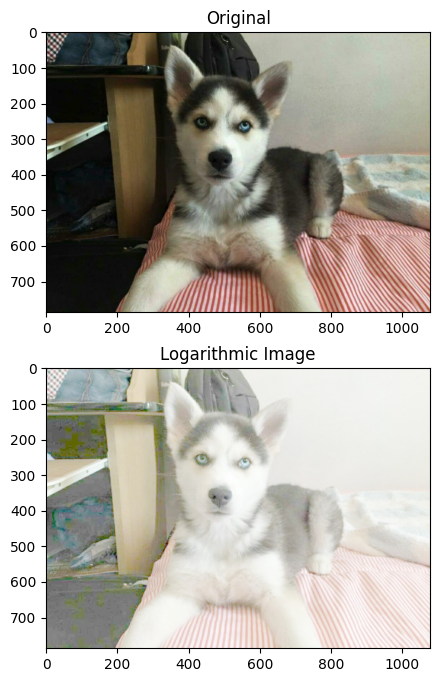

In [140]:
fig = plt.figure(figsize=(8, 8))

# Subplot for original image
a=fig.add_subplot(2,1,1)
imgplot = plt.imshow(orig_img)
a.set_title('Original')

a = fig.add_subplot(2,1,2)
imgplot = plt.imshow(log_img)
a.set_title('Logarithmic Image')

plt.show()

## Image Binarizer (Thresholding) <a class="anchor" id="bin"></a>

Binarize pixels (set pixel values to 0 or 1) according to a threshold.

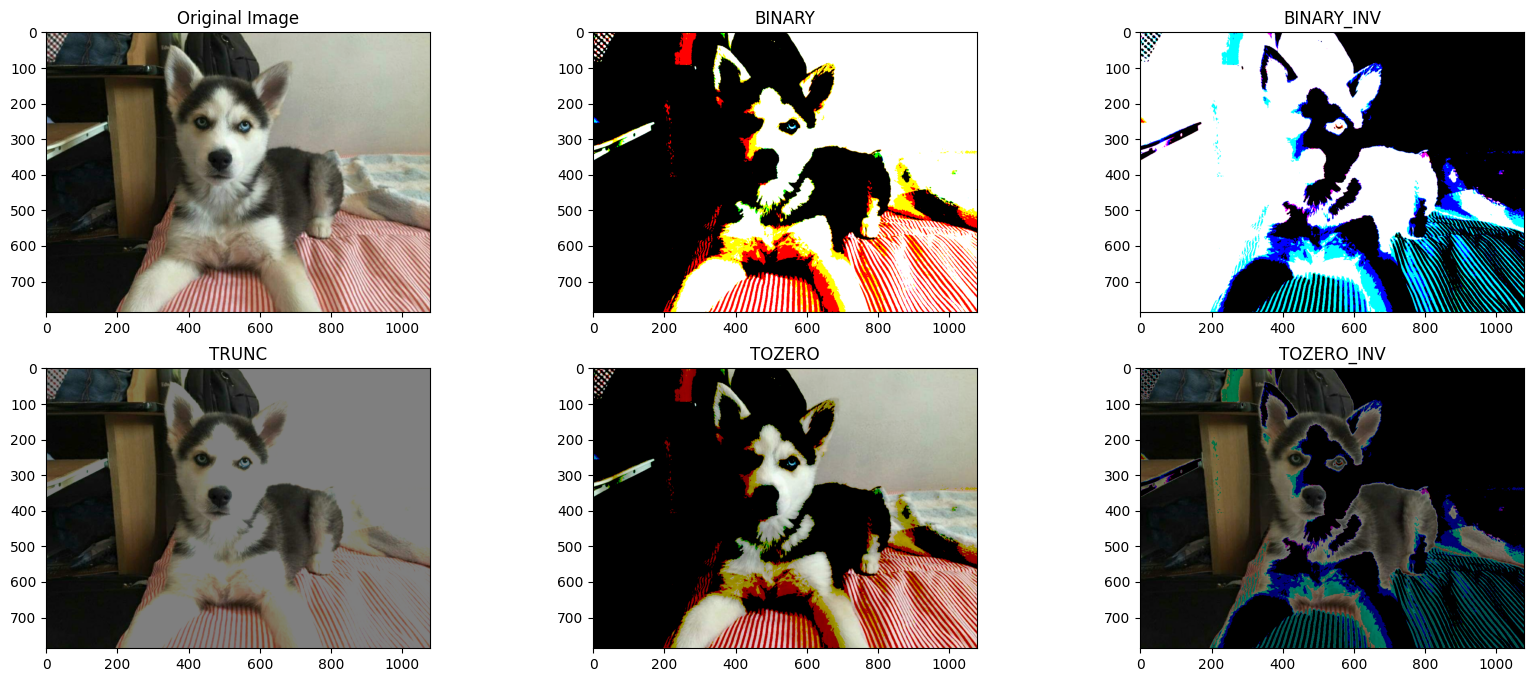

In [141]:
orig_img = cv2.imread('paris.png')
orig_img = cv2.cvtColor(orig_img, cv2.COLOR_BGR2RGB)

ret,thresh1 = cv2.threshold(orig_img,127,255,cv2.THRESH_BINARY)
ret,thresh2 = cv2.threshold(orig_img,127,255,cv2.THRESH_BINARY_INV)
ret,thresh3 = cv2.threshold(orig_img,127,255,cv2.THRESH_TRUNC)
ret,thresh4 = cv2.threshold(orig_img,127,255,cv2.THRESH_TOZERO)
ret,thresh5 = cv2.threshold(orig_img,127,255,cv2.THRESH_TOZERO_INV)

titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [orig_img, thresh1, thresh2, thresh3, thresh4, thresh5]
n = np.arange(6)

fig = plt.figure(figsize=(20, 8))
for i in n:
  plt.subplot(2,3,i+1), plt.imshow(images[i],'gray')
  plt.title(titles[i])

plt.show()

## Image Quantizer  <a class="anchor" id="quant"></a>

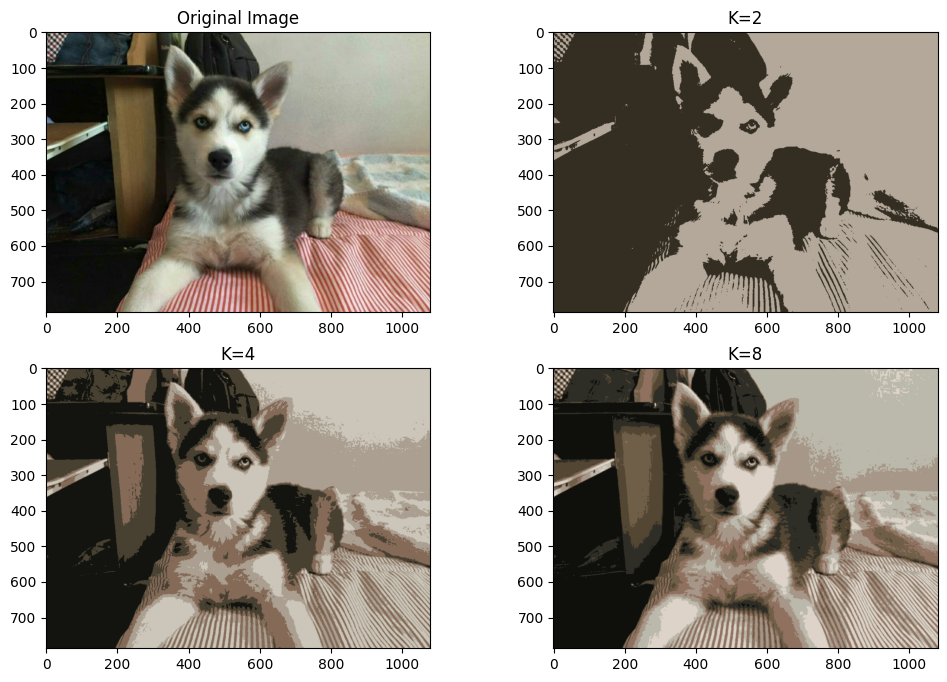

In [142]:
orig_img = cv2.imread('paris.png')

Z = orig_img.reshape((-1,3))

# convert to np.float32
Z = np.float32(Z)

# define criteria, number of clusters(K) and apply kmeans()
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
def colorQuant(Z, K, criteria):

   ret,label,center=cv2.kmeans(Z,K,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)

   # Now convert back into uint8, and make original image
   center = np.uint8(center)
   res = center[label.flatten()]
   res2 = res.reshape((orig_img.shape))
   return res2
res1 = colorQuant(Z, 2, criteria)
res2 = colorQuant(Z, 5, criteria)
res3 = colorQuant(Z, 8, criteria)

fig = plt.figure(figsize=(12, 8))

plt.subplot(221),plt.imshow(cv2.cvtColor(orig_img, cv2.COLOR_BGR2RGB))
plt.title('Original Image')

plt.subplot(222),plt.imshow(cv2.cvtColor(res1, cv2.COLOR_BGR2RGB))
plt.title('K=2')

plt.subplot(223),plt.imshow(cv2.cvtColor(res2, cv2.COLOR_BGR2RGB))
plt.title('K=4')

plt.subplot(224),plt.imshow(cv2.cvtColor(res3, cv2.COLOR_BGR2RGB))
plt.title('K=8')

plt.show()



---


**EJERCICIO 1**


---





---


**Transformaciones Fotométricas**


---


* Ajuste de Brillo (Brightness Adjustment)

* Ajuste de Contraste (Contrast Adjustment)

* Inversión de Colores (Negative Transformation)

* Ajuste de Saturación (Saturation Adjustment)

* Ajuste de Tono (Hue Adjustment)

In [143]:
#Cargamos la imagen a la que le vamos a aplicar las transformaciones

from PIL import Image, ImageEnhance

image = Image.open('paris.png')


**AJUSTE DE BRILLO**

Esta transformación aumenta o disminuye la intensidad de los píxeles, lo cual es útil para simular diferentes condiciones de iluminación y mejorar la robustez del modelo ante variaciones en el brillo

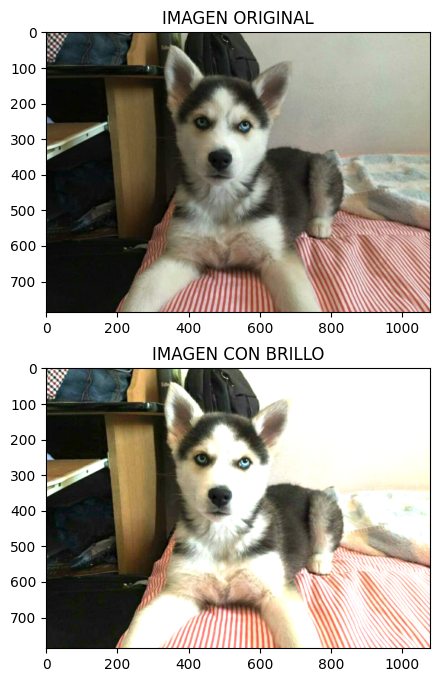

In [144]:
# Creamos un ajustador de brillo
enhancer_AB = ImageEnhance.Brightness(image)

# Aumentamos el brillo en un 60%
imagen_brillo = enhancer_AB.enhance(1.6)

# Guardamos la imagen con brillo ajustado en nuestro google drive
imagen_brillo.save('paris_brillo.png')

# --- Mostramos las modificaciones realizadas
fig = plt.figure(figsize=(8, 8))

paris=fig.add_subplot(2,1,1)
imgplot = plt.imshow(image)
paris.set_title('IMAGEN ORIGINAL')

paris = fig.add_subplot(2,1,2)
imgplot = plt.imshow(imagen_brillo)
paris.set_title('IMAGEN CON BRILLO')

plt.show()

**AJUSTE DE CONTRASTE**

Esta transformación aumenta o disminuye la diferencia entre los píxeles claros y oscuros, mejorando la visibilidad de detalles importantes en la imagen.

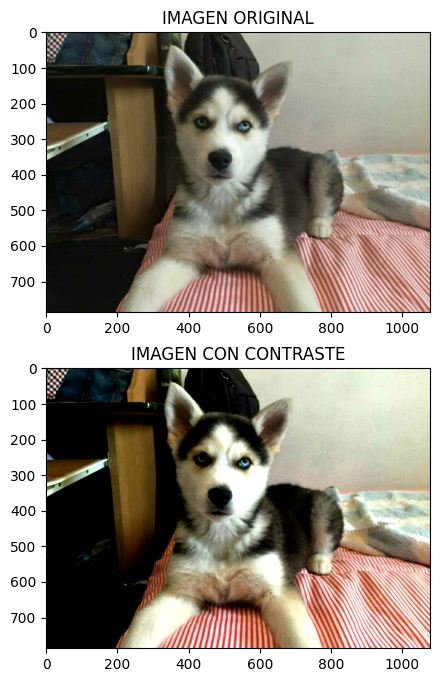

In [145]:
# Creamos un ajustador de contraste
enhancer_CA = ImageEnhance.Contrast(image)

# Aumentamos el contraste en un 50%
imagen_contraste = enhancer_CA.enhance(1.5)

# Guardamos la imagen con contraste
imagen_contraste.save('paris_contraste.png')

# --- Mostramos las modificaciones realizadas
fig = plt.figure(figsize=(8, 8))

paris=fig.add_subplot(2,1,1)
imgplot = plt.imshow(image)
paris.set_title('IMAGEN ORIGINAL')

paris = fig.add_subplot(2,1,2)
imgplot = plt.imshow(imagen_contraste)
paris.set_title('IMAGEN CON CONTRASTE')

plt.show()

**AJUSTE DE SATURACIÓN**

Esta transformación aumenta o disminuye la vivacidad de los colores, lo cual es útil para crear variaciones cromáticas en las imágenes.

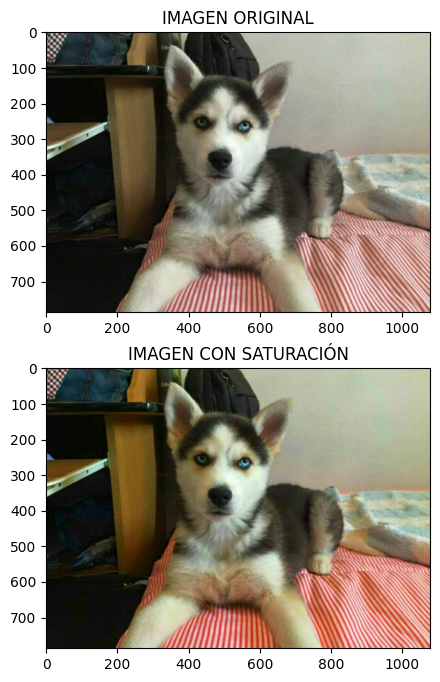

In [146]:
# CreaMOS un ajustador de color
enhancer_AS = ImageEnhance.Color(image)

# Aumentamos la saturación en un 70%
imagen_saturada = enhancer_AS.enhance(1.7)

# Guardamos la imagen con saturación ajustada
imagen_saturada.save('paris_saturada.png')

# --- Mostramos las modificaciones realizadas
fig = plt.figure(figsize=(8, 8))

paris=fig.add_subplot(2,1,1)
imgplot = plt.imshow(image)
paris.set_title('IMAGEN ORIGINAL')

paris = fig.add_subplot(2,1,2)
imgplot = plt.imshow(imagen_saturada)
paris.set_title('IMAGEN CON SATURACIÓN')

plt.show()



---


**EJERCICIO 2**


---



Una aplicación donde podemos usar el NEGATIVO de una imagen en específico es en el procesamiento de imágenes médicas, especialmente en la radiología. En este caso, la inversión de colores puede ayudar a resaltar ciertas áreas de una imagen médica, por ejemplo, una radiografia dental facilitando la detección de anomalías o cambios en tejidos, estructura dental, entre otros.

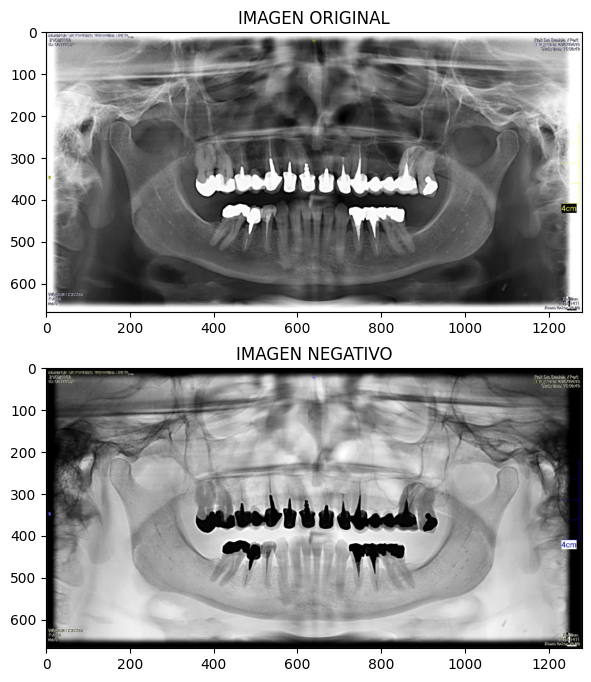

In [147]:
# Invertimos los colores
image_gray = Image.open('dientes.jpg')
imagen_gris = ImageOps.invert(image_gray)

# Guardamos la imagen invertida
imagen_gris.save('paris_invertida.png')

# --- Mostramos las modificaciones realizadas
fig = plt.figure(figsize=(8, 8))

paris=fig.add_subplot(2,1,1)
imgplot = plt.imshow(image_gray)
paris.set_title('IMAGEN ORIGINAL')

paris = fig.add_subplot(2,1,2)
imgplot = plt.imshow(imagen_gris)
paris.set_title('IMAGEN NEGATIVO')

plt.show()



---


**EJERCICIO 3**


---



Una aplicación donde se puede aplicar la corrección GAMMA es en la edición de fotografías y diseño gráfico. La corrección gamma es útil para ajustar el brillo y el contraste de una imagen, mejorando su apariencia, la corrección  gamma ajusta la relación entre los valores de píxeles y el brillo de la pantalla.

In [148]:
def adjust_gamma(image, gamma=1.0):
    inv_gamma = 1.0 / gamma
    table = np.array([((i / 255.0) ** inv_gamma) * 255 for i in np.arange(256)]).astype("uint8")
    return cv2.LUT(image, table)

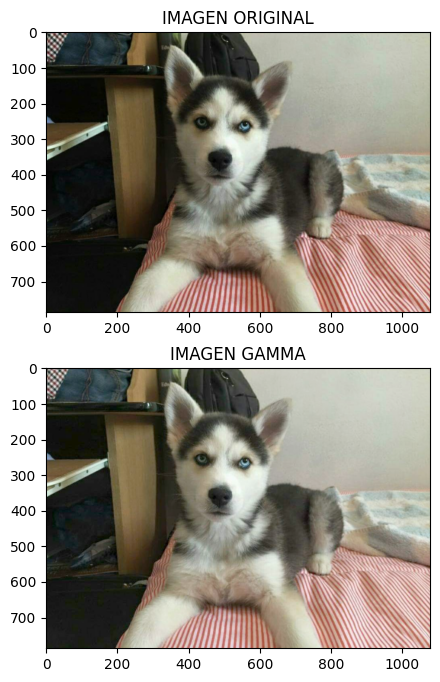

In [149]:
# Aplicamos la corrección gamma con un valor de 1.3
gamma = 1.3
imagen_gamma = adjust_gamma(img3, gamma)

# --- Mostramos las modificaciones realizadas
fig = plt.figure(figsize=(8, 8))

paris=fig.add_subplot(2,1,1)
imgplot = plt.imshow(image)
paris.set_title('IMAGEN ORIGINAL')

paris = fig.add_subplot(2,1,2)
imgplot = plt.imshow(imagen_gamma)
paris.set_title('IMAGEN GAMMA')

plt.show()



---


**EJERCICIO 4**


---



Una aplicación donde se puede usar la SUSTRACCIÓN de imágenes es en la edición de fotografías para eliminar objetos no deseados, como personas, marcas de agua o elementos que distraen.

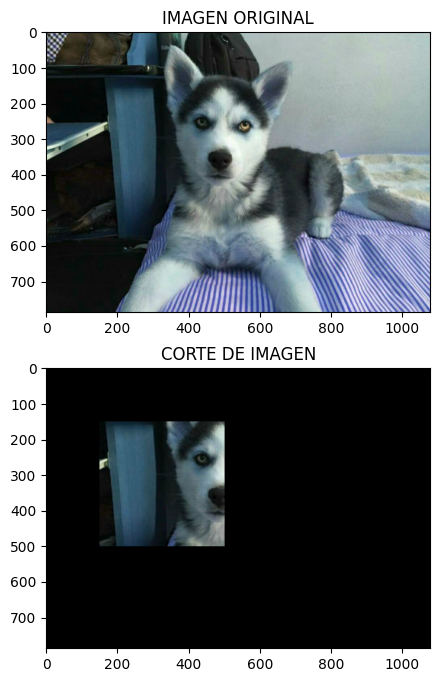

In [156]:
# Creamos una máscara para ilustrar la sustracción
mask = np.zeros(image.shape[:2], dtype="uint8")
cv2.rectangle(mask, (150, 150), (500, 500), 255, -1)  # Máscara rectangular

# Aplicar la máscara a la imagen
masked_image = cv2.bitwise_and(image, image, mask=mask)

# --- Mostramos las modificaciones realizadas
fig = plt.figure(figsize=(8, 8))

paris=fig.add_subplot(2,1,1)
imgplot = plt.imshow(image)
paris.set_title('IMAGEN ORIGINAL')

paris = fig.add_subplot(2,1,2)
imgplot = plt.imshow(masked_image)
paris.set_title('CORTE DE IMAGEN')

plt.show()